In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import lib_subspaces as lsub

In [5]:
cd ~/drive2/HPT/inlet_turb_study/HPT_LS20_DOM80_TI20/Subspaces/

/media/drive2/HPT/inlet_turb_study/HPT_LS20_DOM80_TI20/Subspaces


In [6]:
blocks=range(1,5)

start_TS=5222101
stop_TS= 5262101
inc_TS=500
steps=range(start_TS,stop_TS,inc_TS)
tau_w=lsub.subspace('BL_WALL_SH',12,start_TS,blocks,source_folder='./')
tau_w.load_grid()
tau_w.load_data(steps)

The dataset requires 611.191406 Mb of RAM


# Compute histogram

In [7]:
levs=np.logspace(0,2.3,num=9)
norml = matplotlib.colors.BoundaryNorm(levs, 256)

In [8]:
max_val=0.15
tau_w_hist=np.empty([100,672+383])
j=50
bl=0
for j in range(672):
    a=np.histogram(-tau_w.data[2][0,:,0,j,:],range=(-0.01,max_val),bins=100,density=True)
    tau_w_hist[:,j]=a[0]
for j in range(1,384):  
    a=np.histogram(-tau_w.data[3][0,:,0,j,:],range=(-0.01,max_val),bins=100,density=True)
    tau_w_hist[:,j+671]=a[0]    
bins=a[1]

In [9]:

intv=bins[:-1]+(max_val+0.01)/100.
l=np.concatenate([tau_w.grid[2][0,0,:,0],tau_w.grid[3][0,0,1:,0]])
print l
X,Y=np.meshgrid(l,intv)

[ 0.0691998   0.07038764  0.07157971 ...,  0.99936265  0.99967808  1.        ]


<IPython.core.display.Javascript object>


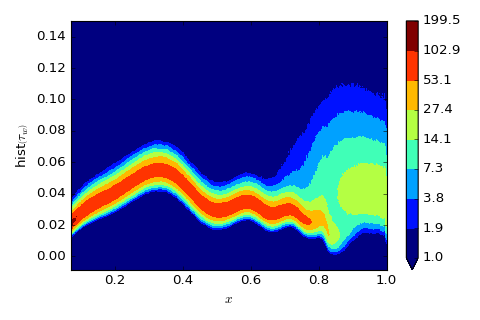

In [10]:
plt.figure(figsize=(6,4))
plt.contourf(X,Y,tau_w_hist+0.01,levels=levs,norm=norml,extend='min')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('hist$\left(\\tau_w\\right)$')
plt.tight_layout()
plt.savefig('../hist_tau_TI20_LS20.pdf')